### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statistics import mode
import re

### Loading Dataset

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

### Check for class imbalance

0    549
1    342
Name: Survived, dtype: int64


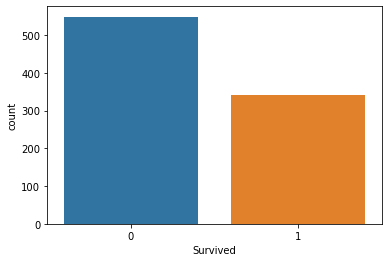

In [6]:
print(train['Survived'].value_counts())                          # 1 is survived
sns.countplot(train['Survived'])

### Data Visuallization

#### Check survive rate for `sex`

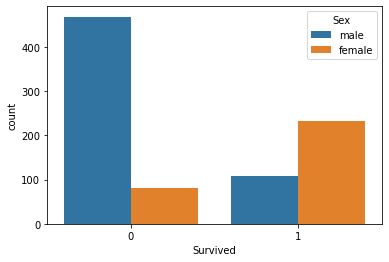

In [61]:
sns.countplot(x='Survived', hue='Sex', data=train)

#### Check survive rate for `Pclass`

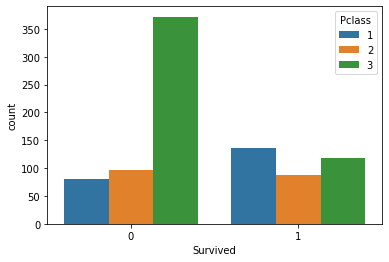

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train)

#### Check survive rate for `Embarked`

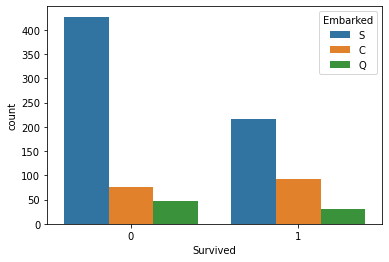

In [8]:
sns.countplot(x='Survived', hue='Embarked', data=train)

#### Save label column values to variable y and drop column from train data

In [10]:
y = train['Survived']
y.shape

(891,)

In [11]:
train = train.drop('Survived',axis = 1)
train.shape

(891, 11)

#### Combine train test data for further processing

In [12]:
df = pd.concat([train,test])
df.shape

(1309, 11)

### Checking for null values 

In [13]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Missing value Imputation

#### Replace null values in `Age` column with median value

In [14]:
# Find the median value for Age to replace null values

print(df['Age'].median())
print(df['Age'].mean())

28.0
29.881137667304014


In [15]:
df['Age'] = df['Age'].transform(lambda x : x.fillna(x.median()))

#### Replace null values in `Fare` column with mean value

In [16]:
df['Fare'] = df['Fare'].transform(lambda x : x.fillna(x.mean()))

#### Replace null value in `Embarked` column with mode value

In [17]:
df['Embarked'].mode()

0    S
dtype: object

In [18]:
df['Embarked'] = df['Embarked'].fillna(mode(df['Embarked']))

In [19]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

There are too much null values in `Cabin` column, so drop it.

In [20]:
df = df.drop('Cabin', axis=1)

In [21]:
df.shape

(1309, 10)

In [22]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Enocoding `Sex`, `Embarked` column values 

In [23]:
# Convert male female & Embarked col to numeric form
df['Sex'][df['Sex'] == 'male'] = 0
df['Sex'][df['Sex'] == 'female'] = 1

In [24]:
df["Embarked"][df["Embarked"] == "S"] = 0
df["Embarked"][df["Embarked"] == "C"] = 1
df["Embarked"][df["Embarked"] == "Q"] = 2

In [25]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#### Plotting `Age` col to see the distribution of values

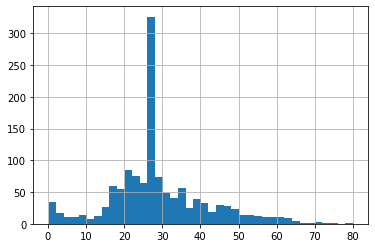

In [26]:
# Plot Age 
df['Age'].hist(bins=40)

In [27]:
#### If person is child or old, then there are more chances of survival.

In [28]:
age_survived = []
for i in df['Age']:
    if i <= 20 or i >=60:
        survived = 1
    else:
        survived = 0
    age_survived.append(survived)

In [29]:
len(age_survived)

1309

In [30]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [31]:
df['Age_survived'] = age_survived

In [32]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


#### Added `Age_survived` col to dataframe based on if age is less than 20 or greater than 60, then there is more chance that they will survive. If person is 'Alone' then there are less chances of his or her survival.

In [33]:
zip_obj = zip(df['SibSp'], df['Parch'])
travelled_alone = []

for i in zip_obj:
    #print(i)
    num_of_traveller = i[0] + i[1]
    #print(num_of_traveller)
    if num_of_traveller > 0:
        travel_alone = 'No'
    else:
        travel_alone = 'Yes'
    travelled_alone.append(travel_alone)


In [34]:
# Add travelled_alone col to df
df['travelled_alone'] = travelled_alone

In [35]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived,travelled_alone
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,No
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,No
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,Yes


In [36]:
# Convert yes no to numeric form
df['travelled_alone'][df['travelled_alone'] == 'Yes'] = 1
df['travelled_alone'][df['travelled_alone'] == 'No'] = 0

In [37]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived,travelled_alone
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


If they are travelling alone then there is a chance that they will not survive

In [38]:
Pclass_survived = []
for i in df['Pclass']:
    if i < 3:
        survived = 1
    else:
        survived = 0
    Pclass_survived.append(survived)

In [39]:
df['Pclass_survived'] = Pclass_survived
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived,travelled_alone,Pclass_survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


#### There are more chances of survival if person is women or kid.

In [41]:
df['Title'] = df.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
df['Title'] = df.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

In [42]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived,travelled_alone,Pclass_survived,Title
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,1,Mrs
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,Mr


In [43]:
# Checking for values in `Title` col
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
the Countess      1
Capt              1
Dona              1
Don               1
Sir               1
Mme               1
Jonkheer          1
Name: Title, dtype: int64

Replacing some values in `Title` col with appropriate value.

In [44]:
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
df['Title'] = df['Title'].replace('Sir','Mr')
df['Title'] = df['Title'].replace('Lady','Mrs')
df['Title'] = df['Title'].replace('Dr','Mr')
df['Title'] = df['Title'].replace('Master','Mr')

In [45]:
df['IsWomanOrBoy'] = ((df.Title == 'Master') | (df.Sex == 1))                        # female = 1

In [46]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived,travelled_alone,Pclass_survived,Title,IsWomanOrBoy
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,0,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,Miss,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,1,Mrs,True
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,Mr,False


In [47]:
df.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Age_survived       0
travelled_alone    0
Pclass_survived    0
Title              0
IsWomanOrBoy       0
dtype: int64

In [48]:
# Family_Size !
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [49]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_survived,travelled_alone,Pclass_survived,Title,IsWomanOrBoy,Family_Size
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,0,Mr,False,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1,Mrs,True,2
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,Miss,True,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,1,Mrs,True,2
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,Mr,False,1


#### Dropping unnecessary col

In [50]:
col_to_drop = ['PassengerId', 'Name', 'Ticket','Title']
df = df.drop(col_to_drop, axis=1)

In [51]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_survived,travelled_alone,Pclass_survived,IsWomanOrBoy,Family_Size
0,3,0,22.0,1,0,7.2500,0,0,0,0,False,2
1,1,1,38.0,1,0,71.2833,1,0,0,1,True,2
2,3,1,26.0,0,0,7.9250,0,0,1,0,True,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,True,2
4,3,0,35.0,0,0,8.0500,0,0,1,0,False,1


In [52]:
df.dtypes

Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Age_survived         int64
travelled_alone     object
Pclass_survived      int64
IsWomanOrBoy          bool
Family_Size          int64
dtype: object

In [53]:
#%% Label Encoding
cat_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        cat_columns.append(column)

encoded_df = pd.get_dummies(df, columns = cat_columns)

In [54]:
encoded_df.head()

,Pclass,Age,SibSp,Parch,Fare,Age_survived,Pclass_survived,IsWomanOrBoy,Family_Size,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,travelled_alone_0,travelled_alone_1
0,3,22.0,1,0,7.2500,0,0,False,2,1,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,True,2,0,1,0,1,0,1,0
2,3,26.0,0,0,7.9250,0,0,True,1,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,True,2,0,1,1,0,0,1,0
4,3,35.0,0,0,8.0500,0,0,False,1,1,0,1,0,0,0,1


In [55]:
encoded_df.shape

(1309, 16)

### Split dataset to train test set again

In [56]:
train = encoded_df[:len(y)]
test = encoded_df[len(y):]

In [57]:
train.shape

(891, 16)

In [58]:
train.isnull().sum()

Pclass               0
Age                  0
SibSp                0
Parch                0
Fare                 0
Age_survived         0
Pclass_survived      0
IsWomanOrBoy         0
Family_Size          0
Sex_0                0
Sex_1                0
Embarked_0           0
Embarked_1           0
Embarked_2           0
travelled_alone_0    0
travelled_alone_1    0
dtype: int64

#### Split data into 80:20 for modelling 

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state=2)

### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state=2)

#### Feature Engineering

In [61]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [62]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = RandomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [63]:
randomForest_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 300}

In [64]:
Model = RandomForestClassifier(random_state = 2, 
                               criterion = 'entropy', 
                               max_depth = 7, 
                               max_features = 'auto', 
                               n_estimators = 300)

Model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=300,
                       random_state=2)

In [65]:
y_pred = Model.predict(X_test)

In [72]:
#%% Find accuracy
from sklearn.metrics import accuracy_score, roc_curve
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.7821229050279329


### Predict on Test data

In [67]:
pred = Model.predict(test)

### Add predictions to submission file

In [68]:
sample_sub = pd.read_csv('data/gender_submission.csv')
sub=pd.DataFrame({'PassengerId':sample_sub['PassengerId'].values.tolist(),'Survived':pred})
sub.to_csv('submission/v25.csv',index=False)